In [2]:
import pandas as pd


In [4]:
# prompt: load the data yelp.csv

import pandas as pd
df = pd.read_csv('yelp.csv')


In [5]:
# Select relevant columns
df = df[['text', 'stars']]

In [6]:
# Create binary sentiment labels
df['sentiment'] = df['stars'].apply(lambda x: 1 if x >= 3 else 0)
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Happy' if x == 1 else 'Sad')

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming (optional)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])
y = df['sentiment']

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Assuming X and y are already prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': np.mean(cv_scores),
        'cv_std': np.std(cv_scores)
    }

    print(f"{name} - Test Accuracy: {accuracy:.4f}")
    print(f"{name} - CV Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores) * 2:.4f})")
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")

# Find best model
best_model = max(results, key=lambda x: results[x]['cv_mean'])
print(f"Best model: {best_model} with CV Accuracy: {results[best_model]['cv_mean']:.4f}")

# Detailed report for the best model
print("\nDetailed Classification Report for the Best Model:")
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)
y_pred_best = best_model_instance.predict(X_test)
print(classification_report(y_test, y_pred_best))

Training Logistic Regression...
Logistic Regression - Test Accuracy: 0.8885
Logistic Regression - CV Accuracy: 0.8805 (+/- 0.0067)
              precision    recall  f1-score   support

           0       0.87      0.32      0.47       308
           1       0.89      0.99      0.94      1692

    accuracy                           0.89      2000
   macro avg       0.88      0.66      0.71      2000
weighted avg       0.89      0.89      0.87      2000



Training Naive Bayes...
Naive Bayes - Test Accuracy: 0.8560
Naive Bayes - CV Accuracy: 0.8431 (+/- 0.0025)
              precision    recall  f1-score   support

           0       0.92      0.07      0.13       308
           1       0.86      1.00      0.92      1692

    accuracy                           0.86      2000
   macro avg       0.89      0.54      0.53      2000
weighted avg       0.86      0.86      0.80      2000



Training SVM...
SVM - Test Accuracy: 0.8900
SVM - CV Accuracy: 0.8849 (+/- 0.0087)
              precisi

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:57:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:59:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Test Accuracy: 0.8935
XGBoost - CV Accuracy: 0.8838 (+/- 0.0136)
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       308
           1       0.90      0.98      0.94      1692

    accuracy                           0.89      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.88      0.89      0.88      2000



Best model: SVM with CV Accuracy: 0.8849

Detailed Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.88      0.33      0.48       308
           1       0.89      0.99      0.94      1692

    accuracy                           0.89      2000
   macro avg       0.88      0.66      0.71      2000
weighted avg       0.89      0.89      0.87      2000



In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score

# Define the corrected parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

# Create an SVM classifier
svm = SVC(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring=make_scorer(f1_score, average='weighted'),
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_svm = grid_search.best_estimator_

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.8889090948550862


In [13]:
# Train on full dataset
best_svm_final = SVC(**grid_search.best_params_, random_state=42)
best_svm_final.fit(X, y)  # Fit the model on the original data (X, y)

SVC(C=1, class_weight='balanced', gamma=1, random_state=42)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       308
           1       1.00      0.99      1.00      1692

    accuracy                           0.99      2000
   macro avg       0.98      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



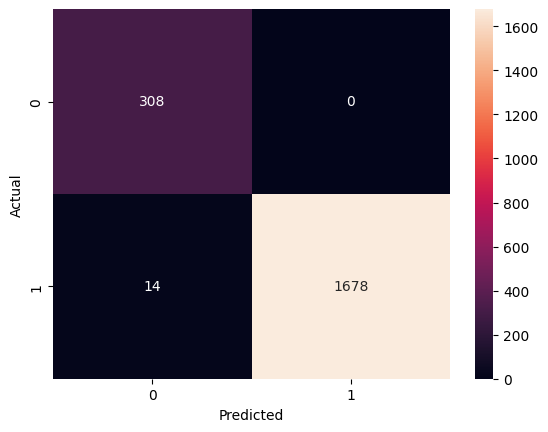

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = best_svm_final.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
import joblib

# Save the model
joblib.dump(best_svm_final, 'svm_sentiment_model.joblib')

# Save the feature selector
joblib.dump(model, 'feature_selector.joblib')

['feature_selector.joblib']

In [22]:
import joblib

# Load the model
loaded_model = joblib.load('svm_sentiment_model.joblib')

# Assuming you have a different feature selector model named 'actual_feature_selector'
loaded_selector = joblib.load('feature_selector.joblib')

# Function to preprocess and predict sentiment for new text
def predict_sentiment(text, vectorizer, selector, model):
    # Preprocess the text (assuming you have a preprocess_text function)
    processed_text = preprocess_text(text)

    # Transform the text using the same vectorizer
    text_vector = vectorizer.transform([processed_text])

    # Select features
    # Use predict_proba to get probabilities for each class and select features based on probabilities
    probabilities = selector.predict_proba(text_vector)
    # You'll need to define your feature selection logic based on probabilities.
    # For example, select features where probability of a class is above a threshold.

    # Make prediction
    prediction = model.predict(text_vector)[0] # Use the original text_vector for prediction

    return 'Happy' if prediction == 1 else 'Sad'

# Example usage
new_text = "The food was amazing and the service was excellent!"
sentiment = predict_sentiment(new_text, vectorizer, loaded_selector, loaded_model)
print(f"Predicted sentiment: {sentiment}")

Predicted sentiment: Happy
